In [1]:
# Project Objective
# 1. Use ALPACA api to downlaod real time data
# 2. Determine whether to invest long-term in 3 individual stocks using simple moving averages 30, 60, and 100 days.

In [5]:
# Import all neccessary libraries
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import requests
import os
import alpaca_trade_api as tradeapi
%matplotlib inline

In [6]:
# Load alpaca api keys
load_dotenv("env.txt")

True

In [10]:
# load alpaca api and alpaca secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [11]:
# Set up request to alpaca api
alpaca_request = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version ="v2"
)

In [12]:
# Set up timeframe and timezone
start = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-07-10", tz="America/New_York").isoformat()

timeframe = "1D"

In [14]:
# Set up tickers
tickers = ["MSFT", "SNAP", "JPM"]

In [15]:
# Send request to Alpaca API
df_portfolio = alpaca_request.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

In [16]:
# Check dataframe
df_portfolio.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-01-02 05:00:00+00:00,139.79,141.10,139.265,141.09,10872984,79031,140.465962,JPM
2020-01-03 05:00:00+00:00,137.52,139.23,137.080,138.34,10387554,76937,138.407143,JPM
2020-01-06 05:00:00+00:00,136.56,138.27,136.500,138.23,10266840,69885,137.703840,JPM
2020-01-07 05:00:00+00:00,137.28,137.86,135.820,135.88,10576990,92925,136.474316,JPM
2020-01-08 05:00:00+00:00,135.70,137.58,135.600,136.94,9697731,81003,136.827261,JPM


In [17]:
# Seperate each stock into their own individual frames
msft_df = df_portfolio.loc[df_portfolio["symbol"]=="MSFT"].drop(columns=["open","high","low","volume","trade_count","vwap","symbol"])
snap_df = df_portfolio.loc[df_portfolio["symbol"]=="SNAP"].drop(columns=["open","high","low","volume","trade_count","vwap","symbol"])
jpm_df = df_portfolio.loc[df_portfolio["symbol"]=="JPM"].drop(columns=["open","high","low","volume","trade_count","vwap","symbol"])

In [20]:
# Rename column's name for each dataframe
msft_df.columns = ["MSFT"]
snap_df.columns = ["SNAP"]
jpm_df.columns = ["JPM"]

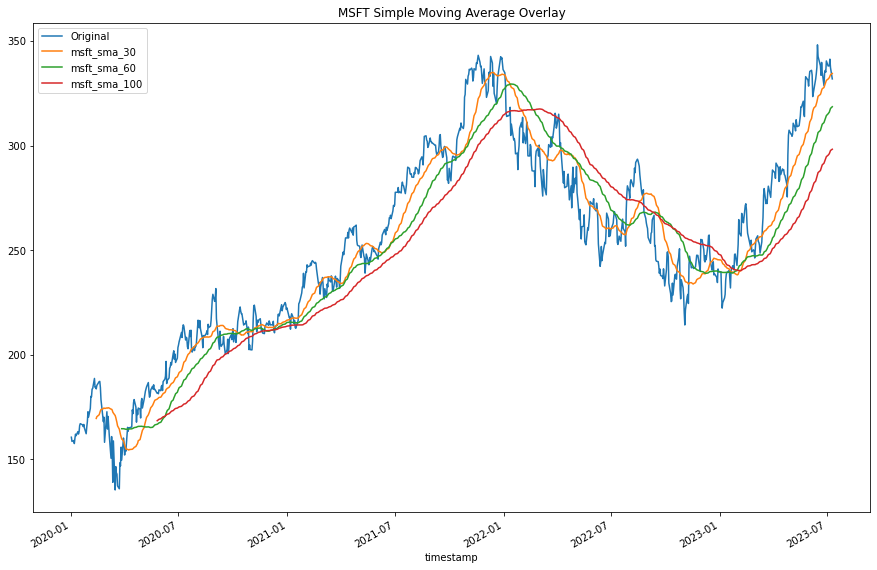

In [22]:
# Compute for MSFT simple moving average 30,60,100
ax = msft_df.plot(figsize=(15,10), title="MSFT Simple Moving Average Overlay")

msft_sma_30 = msft_df.rolling(window=30).mean().plot(ax=ax)
msft_sma_60 = msft_df.rolling(window=60).mean().plot(ax=ax)
msft_sma_100 = msft_df.rolling(window=100).mean().plot(ax=ax)

ax.legend(["Original","msft_sma_30","msft_sma_60","msft_sma_100"])

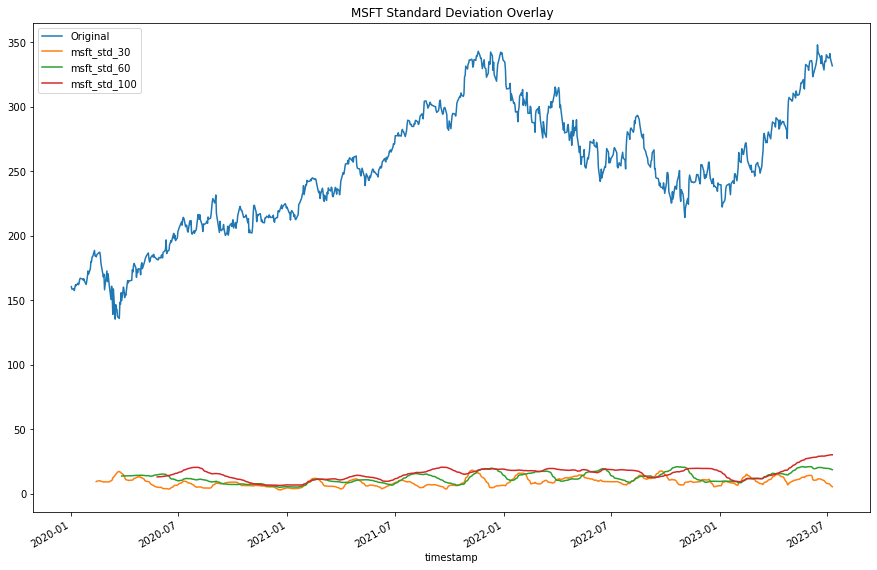

In [23]:
# Compute for MSFT std 30,60,100
ax = msft_df.plot(figsize=(15,10), title="MSFT Standard Deviation Overlay")

msft_std_30 = msft_df.rolling(window=30).std().plot(ax=ax)
msft_std_60 = msft_df.rolling(window=60).std().plot(ax=ax)
msft_std_100 = msft_df.rolling(window=100).std().plot(ax=ax)

ax.legend(["Original","msft_std_30","msft_std_60","msft_std_100"])

In [24]:
# Base on the graph MSFT seems like it has been an upward trend, with very minimal volatility.

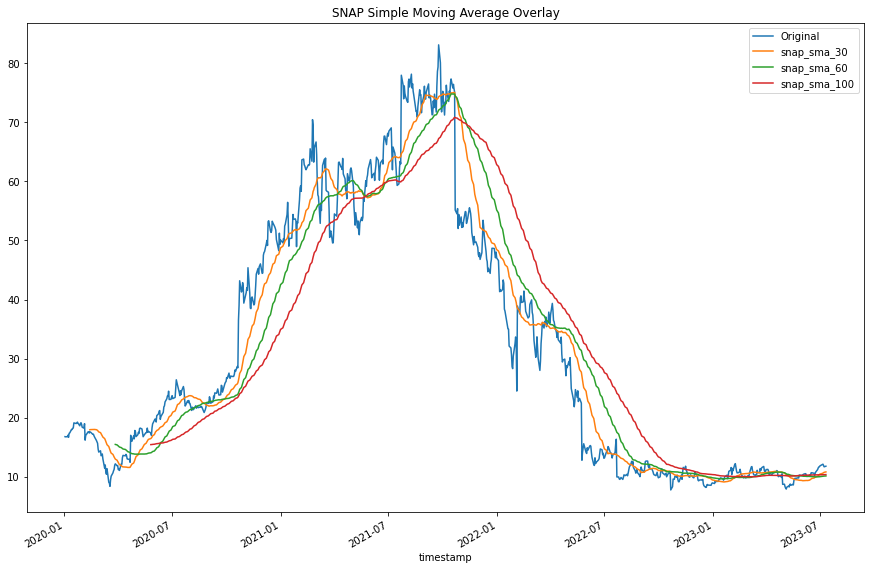

In [26]:
# Compute for SNAP simple moving average 30,60,100
ay = snap_df.plot(figsize=(15,10), title="SNAP Simple Moving Average Overlay")

snap_sma_30 = snap_df.rolling(window=30).mean().plot(ax=ay)
snap_sma_60 = snap_df.rolling(window=60).mean().plot(ax=ay)
snap_sma_100 = snap_df.rolling(window=100).mean().plot(ax=ay)

ay.legend(["Original","snap_sma_30","snap_sma_60","snap_sma_100"])

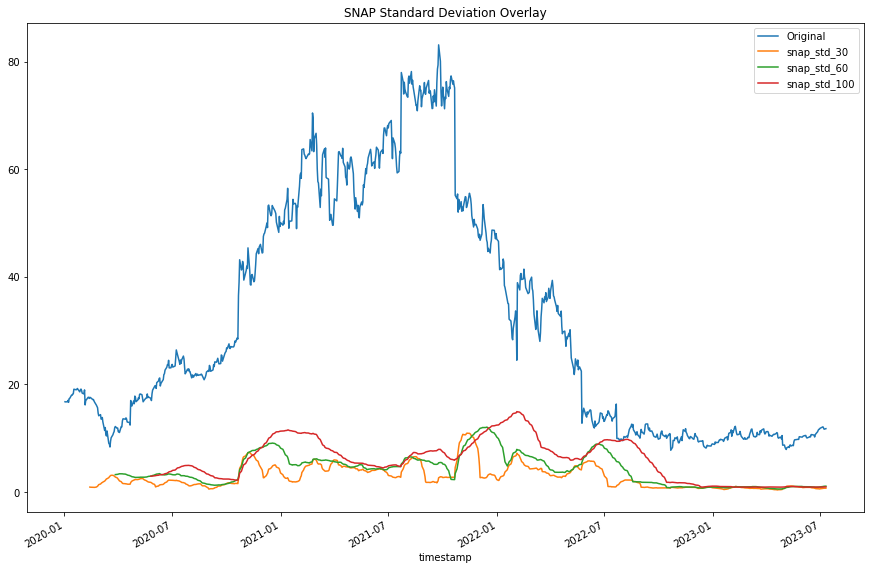

In [30]:
# Compute for SNAP std 30,60,100
ay = snap_df.plot(figsize=(15,10), title="SNAP Standard Deviation Overlay")

snap_std_30 = snap_df.rolling(window=30).std().plot(ax=ay)
snap_std_60 = snap_df.rolling(window=60).std().plot(ax=ay)
snap_std_100 = snap_df.rolling(window=100).std().plot(ax=ay)

ay.legend(["Original","snap_std_30","snap_std_60","snap_std_100"])

In [31]:
# Based on the graph, it seems snap chat has been on a downward trend with a lot of volatility

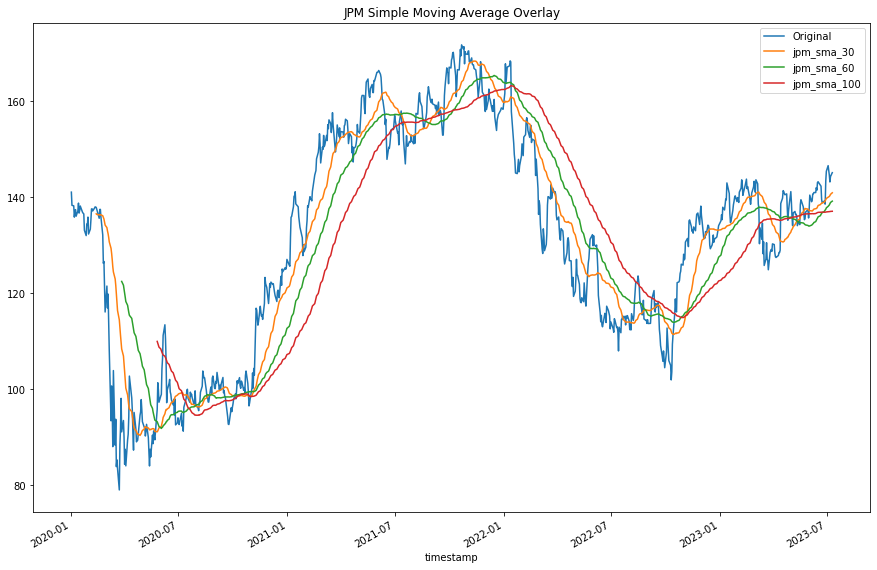

In [32]:
# Compute for JPM simple moving average 30,60,100
az = jpm_df.plot(figsize=(15,10), title="JPM Simple Moving Average Overlay")

jpm_sma_30 = jpm_df.rolling(window=30).mean().plot(ax=az)
jpm_sma_60 = jpm_df.rolling(window=60).mean().plot(ax=az)
jpm_sma_100 = jpm_df.rolling(window=100).mean().plot(ax=az)

az.legend(["Original","jpm_sma_30","jpm_sma_60","jpm_sma_100"])

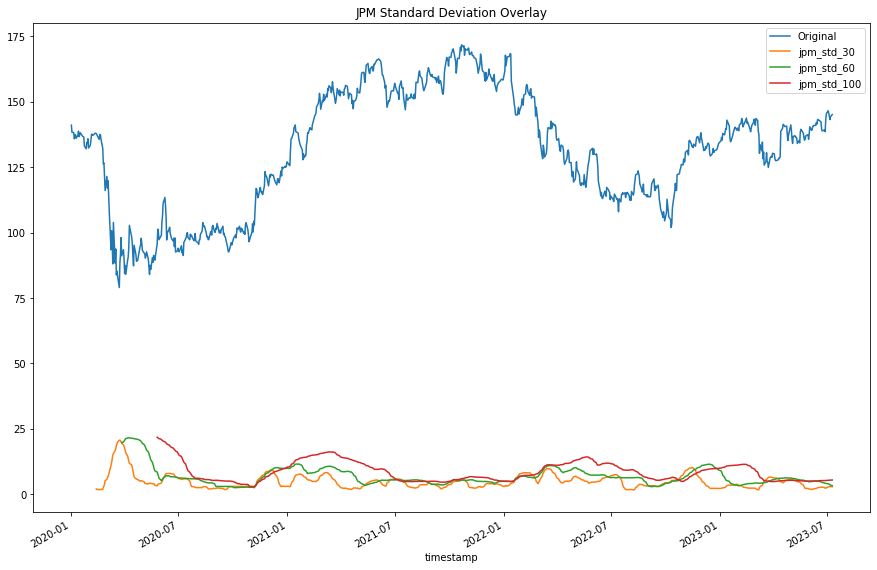

In [33]:
# Compute for JPM std 30,60,100
az = jpm_df.plot(figsize=(15,10), title="JPM Standard Deviation Overlay")

jpm_std_30 = jpm_df.rolling(window=30).std().plot(ax=az)
jpm_std_60 = jpm_df.rolling(window=60).std().plot(ax=az)
jpm_std_100 = jpm_df.rolling(window=100).std().plot(ax=az)

az.legend(["Original","jpm_std_30","jpm_std_60","jpm_std_100"])

In [34]:
# Base on the graphs, we can see that JPM is in general moving upward with less fluctuation in the short term than long term

In [35]:
# Based on the graphs alone, the ranking for stocks would be as follow, 1. MSFT, 2. JPM, 3. SNAP